In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack
import scipy
from numpy import mean,square,sqrt


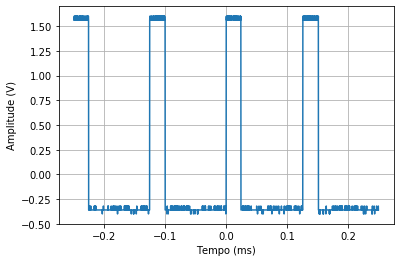

In [511]:

labels = ["05","06","07","08","09","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26",
         "27","28","29","30","31","32","33","34","35","36","37","38"] #choose the dataset
duty = 20 #duty cycle of the dataset

df_data = pd.read_csv("~/TCC/stimuli_validation/oscilloscope/ALL00"+labels[10]+"/F00"+labels[10]+"CH1.CSV")
amplitude = df_data.iloc[:,4].to_numpy() #amplitude column
time = df_data.iloc[:,3].to_numpy() #time column    
amplitude = amplitude + abs(amplitude.min())

amplitude = amplitude - duty/100*amplitude.max()##offset /medio 

plt.plot(time,amplitude)
plt.ylabel('Amplitude (V)')
plt.xlabel ('Tempo (ms)')
plt.grid('on')



(0, 2)

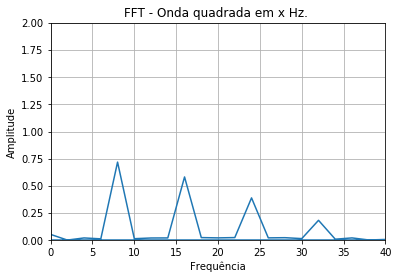

In [513]:
N = len(time) # signal length
ts = time[2]-time[1] #period sampling
fs = 1/ts

t = np.linspace(0, N*ts, N)
transf = scipy.fftpack.fft(amplitude) 

freqs = fftpack.fftfreq(len(amplitude)) * fs #return the frequencies associated to the coefficients

fig, ax = plt.subplots()

ax.plot(freqs, 2/N * np.absolute(transf))
plt.title("FFT - Onda quadrada em x Hz. ")
plt.xlabel("Frequência")
plt.ylabel("Amplitude")
plt.grid('on')
ax.set_xlim(0,40)
ax.set_ylim(0, 2)